In [1]:
# Python set up (load modules) 
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='winter')

ModuleNotFoundError: No module named 'numpy'

# Linear regression and the quality of fit

In this application we cover linear regression - the fundamental starting point for all regression methods - and how to evaluate the quality of fit of a regression model. Therefore, we quantify the extent to which the predicted outcome value for a given observation is close to the true outcome value for that observation. In the regression setting, the most commonly-used measure is the mean squared error (MSE), which we will cover in detail.

One of the simplest models we use in statistics is the **mean**. It is a (simple) model because it represents a summary of data. Therefore, we use the mean as a baseline model and compare the quality of fit between the mean and a simple linear regression model with only one predictor. In our application, we use a sample of 20 adult german women from whom we obtained their height and the average height of their parents (height_parents).

Data description (n = 20, p = 5); Variables: name, unique identification number (id), height, average height of parents (height_parents), gender.

---

*Source*

*The statistical explanations in this tutorial are mainly based on Field (2018).*

Field, A. (2018). Discovering statistics using IBM SPSS statistics. Thousand Oaks, CA.

---

## Import data

In [2]:
# Instead of importing data, we will create our own data
df = pd.DataFrame({ 'name': pd.Categorical([ "Stefanie", "Petra", "Stefanie", 
                                             "Manuela", "Nadine", "Sophia",  
                                             "Ellen", "Emilia", "Lina", 
                                             "Marie", "Lena", "Mila",    
                                             "Ida", "Ella", "Pia", 
                                             "Sarah ", "Lia", "Lotta", 
                                             "Emma", "Lina"]),
                       'id': pd.Categorical(["1", "2", "3", "4", "5", "6",  
                                             "7", "8", "9", "10", "11", "12",    
                                             "13", "14", "15", "16 ", "17", "18", 
                                             "19", "20"]),
                          'height': np.array([162, 163, 163, 164, 164, 164, 164, 165, 
                                              165, 165, 165, 165, 165, 166, 166, 166,
                                              166, 167, 167, 168],dtype='int32'),
                  'height_parents': np.array([161, 163, 163, 165, 163, 164, 164, 165, 
                                              165, 165, 166, 167, 165, 166, 166, 166,
                                              166, 166, 167, 168],dtype='int32'),
                                    'gender': 'female' })

##  Tidying data

###  Data inspection

First of all, let's take a look at the variables (columns) in the data set.

In [3]:
# show all variables in the data set
df.columns

Index(['name', 'id', 'height', 'height_parents', 'gender'], dtype='object')

In [4]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(10)

,name,id,height,height_parents,gender
0,Stefanie,1,162,161,female
1,Petra,2,163,163,female
2,Stefanie,3,163,163,female
3,Manuela,4,164,165,female
4,Nadine,5,164,163,female
5,Sophia,6,164,164,female
6,Ellen,7,164,164,female
7,Emilia,8,165,165,female
8,Lina,9,165,165,female
9,Marie,10,165,165,female


In [5]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["id"])

20

In [6]:
# check for duplicates and print results (if the two numbers match, we have no duplicates)
# show the lenght of the variable id (i.e. the number of observations)
print(f'IDs: {len(df["id"])}')
# count the number of individual id's
print(f'Unique IDs: {len(df["id"].value_counts())}')

IDs: 20
Unique IDs: 20


In [7]:
# we don't need the variable gender 
df = df.drop('gender', axis=1)

In [8]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            20 non-null     category
 1   id              20 non-null     category
 2   height          20 non-null     int32   
 3   height_parents  20 non-null     int32   
dtypes: category(2), int32(2)
memory usage: 1.7 KB


In [9]:
# show the first 20 rows (i.e. head of the DataFrame)
df.head(20)

,name,id,height,height_parents
0,Stefanie,1,162,161
1,Petra,2,163,163
2,Stefanie,3,163,163
3,Manuela,4,164,165
4,Nadine,5,164,163
5,Sophia,6,164,164
6,Ellen,7,164,164
7,Emilia,8,165,165
8,Lina,9,165,165
9,Marie,10,165,165


### Handle missing values

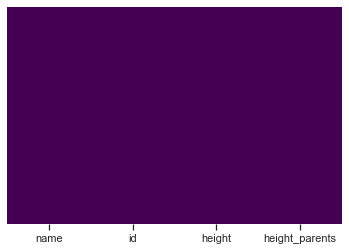

In [10]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

We can also check the column-wise distribution of null values:

In [11]:
print(df.isnull().sum())

name              0
id                0
height            0
height_parents    0
dtype: int64


## Transform data

###  Descriptive statistics

#### Measures of central tendency

First of all we obtain some common statistics per variable.

In [12]:
# mode
df['height'].mode()

0    165
dtype: int32

In [13]:
# calculate mean
print(f'The mean: {round(df["height"].mean(),2)}')
# calculate median
print(f'The median: {df["height"].median()}')

The mean: 165.0
The median: 165.0


#### Measures of dispersion 

In [14]:
# quantiles
df['height'].quantile([.25, .5, .75])

0.25    164.0
0.50    165.0
0.75    166.0
Name: height, dtype: float64

In [15]:
# Range
df['height'].max() - df['height'].min()

6

In [16]:
# standard deviation
round(df['height'].std(),2)

1.49

#### Summary statistics

In [17]:
# summary statistics for all numerical columns
round(df.describe(),2)

,height,height_parents
count,20.00,20.00
mean,165.00,165.05
std,1.49,1.67
min,162.00,161.00
25%,164.00,164.00
50%,165.00,165.00
75%,166.00,166.00
max,168.00,168.00


In [18]:
# summary statistics for all categorical columns
df.describe(include=['category'])

,name,id
count,20,20
unique,18,20
top,Stefanie,1
freq,2,1


## Visualize data

### Distibution of Variables

/Users/jankirenz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


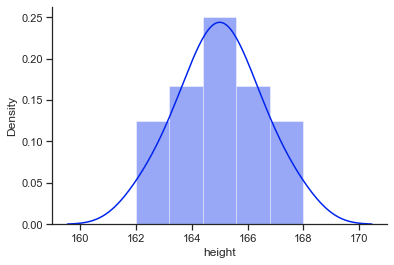

In [19]:
# histogram with seaborn
sns.distplot(df.height);

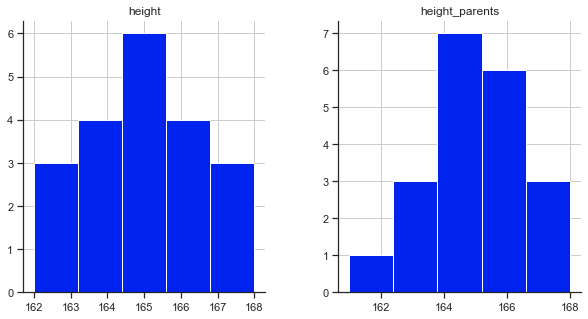

In [20]:
df.hist(bins=5, figsize=(10,5));

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the **boxplot**. A boxplot is a type of visual shorthand for a distribution of values that is popular among statisticians. Each boxplot consists of:

A box that stretches from the 25th percentile of the distribution to the 75th percentile, a distance known as the interquartile range (IQR). In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution. These three lines give you a sense of the spread of the distribution and whether or not the distribution is symmetric about the median or skewed to one side.

Visual points that display observations that fall more than 1.5 times the IQR from either edge of the box. These outlying points are unusual so are plotted individually.

A line (or whisker) that extends from each end of the box and goes to the farthest non-outlier point in the distribution.

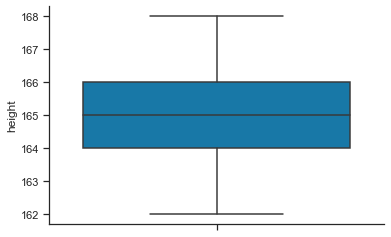

In [21]:
# boxplot 
sns.boxplot(y='height', data=df, palette='winter');

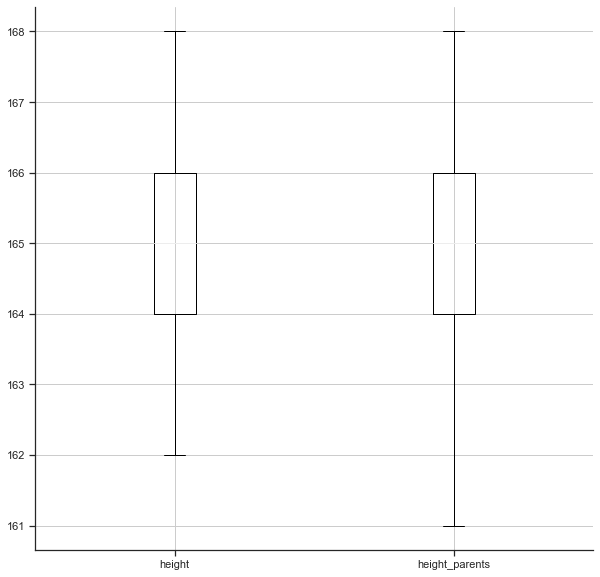

In [22]:
df.boxplot(figsize=(10,10));

### Relationship between variables

AttributeError: 'PathCollection' object has no property 'stat_func'

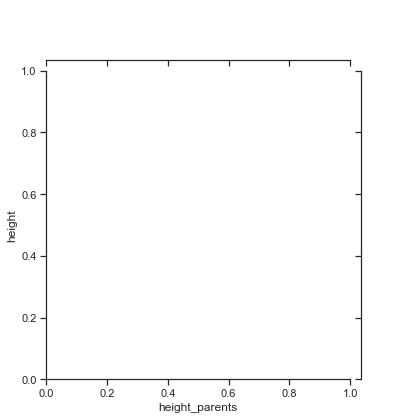

In [23]:
# check relationship with a joint plot
sns.jointplot(x="height_parents", y="height", data=df, stat_func=None);

We can observe a strong relationship between the average height of the parents and the height of their daughter. Hence, it would make sense to use the variable "height_parents" as a predictor for the outcome variable "height" in a statistical model.

## Model

If we are interested in discovering something about a phenomenon in the real world, we need to collect data to test predictions from our hypotheses about that phenomenon. Testing these hypotheses involves building statistical **models** of the phenomenon of interest.

It is important that the model accurately represents the real world, otherwise any conclusions we extrapolate to the real-world will be meaningless. Hence, the statistical model should represent the data collected (the observed data) as closely as possible. 

$$Outcome_i = (Model) + error_i$$

This equation means that the data we observe can be predicted from the model we choose to fit plus some amount of error. There are different terms that basically refer to **error** like **residual**, **deviation** or **deviance**. The degree to which a statistical model represents the data collected is known as the **fit of the model** which is closely related to the error of the model.

The ‘model’ in the equation will vary depending on the design of your study, the type of data you have and what it is you’re trying to achieve with your model. Consequently, the model can also vary in its complexity.

The important thing is that we can use the model computed in our **sample** to estimate the value in the **population** (which is the value in which we’re interested).

# Parameters

Statistical models are made up of **variables** and **parameters**. Variables are measured constructs that vary across entities in the sample. In contrast, parameters are not measured and are (usually) constants believed to represent some fundamental truth about the relations between variables in the model.

Some examples of parameters with which you already are familiar are: the **mean** and **median** (which estimate the centre of the distribution). We will also cover correlation and regression coefficients (which estimate the relationship between two variables) in other applications.

If we’re interested only in summarizing the outcome, as we are when we compute a **mean**, then we won’t have any variables in the model, only a **parameter** (typically called *b*), so we could write our $Outcome_i = (Model) + error_i$ equation as:

$Outcome_i = (b) + error_i$

---

Let's say we would like to compare the **quality of fit** of two models to predict height: the simple mean and a second model in which we use information about the average height of their parents as a predictor in a linear regression model.

**Model 1: Mean**
  * In the case of the **mean**, the *b* parameter is usually called $\bar{x}$, which leads to:

$height_i = (\bar{x}) + error_i$
  * with

$\bar{x} =  \frac {\sum_{i=1}^n x_{i}}{n}$

**Model 2: Linear Regression**
  * In our second model, we use the variable height of parents as predictor in a linear regression model:

$height_i = (b_0 + b_i \times heightparents_i ) + error_i$


### Model 1: Mean

In [ ]:
# calculate the mean 
sum_x_i = df.height.sum() 
n = len(df["height"])
# formula for mean
x_bar = sum_x_i / n
print(x_bar)

165.0


In [ ]:
# calculate the mean
df["height"].mean()

165.0

In [ ]:
# add the mean (as "average") to our DataFrame
df = df.assign(average = df.height.mean())
df.head(5)

,name,id,height,height_parents,average
0,Stefanie,1,162,161,165.0
1,Petra,2,163,163,165.0
2,Stefanie,3,163,163,165.0
3,Manuela,4,164,165,165.0
4,Nadine,5,164,163,165.0


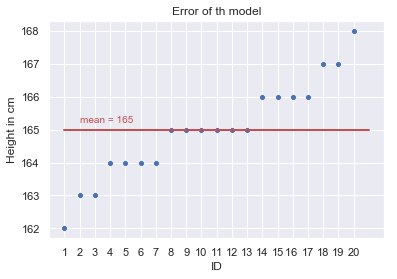

In [ ]:
# create a scatterplot (plt)
plt = sns.scatterplot(x="id", y="height",data=df);
plt.set(xlabel='ID', ylabel='Height in cm', title='Error of th model');
plt.plot([0, 20], [165, 165], linewidth=2, color='r');
plt.text(1, 165.2,'mean = 165', rotation=0, color='r');

### Model 2: Linear Regression

In [ ]:
# fit linear model with statsmodels.formula.api (with R-style formulas) 
lm = smf.ols(formula ='height ~ height_parents', data=df).fit()

# add the regression predictions (as "pred") to our DataFrame
df['pred'] = lm.predict()

In [ ]:
df.head(5)

,name,id,height,height_parents,average,pred
0,Stefanie,1,162,161,165.0,161.711048
1,Petra,2,163,163,165.0,163.335222
2,Stefanie,3,163,163,165.0,163.335222
3,Manuela,4,164,165,165.0,164.959396
4,Nadine,5,164,163,165.0,163.335222


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     88.78
Date:                Mon, 13 May 2019   Prob (F-statistic):           2.21e-08
Time:                        11:20:24   Log-Likelihood:                -17.995
No. Observations:                  20   AIC:                             39.99
Df Residuals:                      18   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.9651     14.226      2.177      0.043       1.077      60.853
height_parents     0.8121      0.086      9.422      0.000       0.631       0.993
==============================================================================
Omnibus:                        4.700   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.492
Skew:                          -0.684   Prob(JB):                        0.288
Kurtosis:                       4.058   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# This is just a reminder of how the regression works. We make a prediction for X=200
b_0 = 30.9651
b_1 = 0.8121
X = 200
Vorhersage = b_0 + b_1*(X)
print(Vorhersage)

193.38510000000002


In [ ]:
df.head(5)

,name,id,height,height_parents,average,pred
0,Stefanie,1,162,161,165.0,161.711048
1,Petra,2,163,163,165.0,163.335222
2,Stefanie,3,163,163,165.0,163.335222
3,Manuela,4,164,165,165.0,164.959396
4,Nadine,5,164,163,165.0,163.335222


We use [Seaborne's lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to plot the regression line:

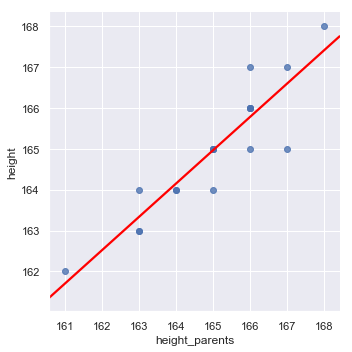

In [ ]:
# Plot regression line 
sns.lmplot(x='height_parents', y='height', data=df, line_kws={'color':'red'}, height=5, ci=None, );

In [ ]:
# Regression results overview
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     88.78
Date:                Mon, 13 May 2019   Prob (F-statistic):           2.21e-08
Time:                        11:20:24   Log-Likelihood:                -17.995
No. Observations:                  20   AIC:                             39.99
Df Residuals:                      18   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.9651     14.226      2.177      0.043       1.077      60.853
height_parents     0.8121      0.086      9.422      0.000       0.631       0.993
==============================================================================
Omnibus:                        4.700   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.492
Skew:                          -0.684   Prob(JB):                        0.288
Kurtosis:                       4.058   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Measuring the quality of fit: errors

In order to evaluate the performance of a statistical model on a given data set, we need some way to measure how well its predictions actually match the observed data. That is, we need to quantify the extent to which the predicted response value for a given observation is close to
the true response value for that observation. 

With most statistical models we can determine whether the model represents the data well by looking at how different the scores we observed in the data are from the values that the model predicts.

$Outcome_i = (b) + error_i$, hence

$error_i = Outcome_i - (b)$

In other words, the error for a particular entity is the score predicted by the model for that entity subtracted from the corresponding observed score.


### Sum of squared errors and $R^2$

Errors cancel out because some are positive and others negative. Therefore, we square each deviation. If we add these squared deviations we get the **Sum of Squared Errors (SS)**.

$ SS = \sum_{i=1}^n (outcome_i - model_i)^2$ 

Using the **mean** of the outcome as a baseline model, we can calculate the difference between the observed values and the values predicted by the mean. We square these differences to give us the sum of squared differences. This sum of squared differences is known as the **total sum of squares** (denoted by $SS_T$) and it represents how good the mean is as a model of the observed outcome scores

$SS_T = \sum_{i=1}^n (observed_i - mean)^2$

We can use the values of $SS_T$ and the sum of squared residuals ($SS_R$) 

$SS_R =  \sum_{i=1}^n (observed_i - model_i )^2$

to calculate how much better the linear model is than the baseline model of ‘no relationship’ (the mean). The improvement in prediction resulting from using the linear model rather than the mean is calculated as the difference between $SS_T$ and $SS_R$.

This difference shows us the reduction in the inaccuracy of the model resulting from fitting the regression model to the data. This improvement is the **model sum of squares**($SS_M$):

$SS_M = SS_T - SS_R$

If the value of $SS_M$ is *large*, the linear model is very different from using the mean to predict the outcome variable. This implies that the linear model has made a big improvement to predicting the outcome variable. 

If $SS_M$ is *small* then using the linear model is little better than using the mean (i.e., the model is no better than predicting from ‘no relationship’). 

A useful measure arising from these sums of squares is the proportion of improvement due to the model. This is calculated by dividing the sum of squares for the model by the total sum of squares to give a quantity called $R^2$

$$R^2 = \frac {SS_M}{SS_T}$$


with 

$SS_T =  \sum_{i=1}^n (observed_i - mean)^2$

$SS_R =  \sum_{i=1}^n (observed_i - model_i )^2$

$SS_M = SS_T - SS_R$

To express the $R^2$-value as a percentage multiply it by 100. $R^2$ represents the amount of variance in the outcome explained by the model ($SS_M$) relative to how much variation there was to explain in the first place ($SS_T$): it represents the proportion of the variation in the outcome that can be predicted from the model. Therefore, it can take any value between 0% and 100%. 

**Adjusted** $R^2$: Whereas $R^2$ tells us how much of the variance in Y overlaps with predicted values from the model in our sample, adjusted $R^2$ tells us how much variance in Y would be accounted for if the model had been derived from the **population** from which the sample was taken (takes degrees of freedom into account). Therefore, the adjusted value indicates the loss of predictive power or shrinkage. 

**As a general rule it is preferrable to use the adjusted $R^2$ instead of the simple $R^2$.**


#### Model 1: Mean

In [ ]:
# calculate error (observation - average) and assign it to dataframe
df = df.assign(error = (df['height'] - df['average']))
df.head(5)

,name,id,height,height_parents,average,pred,error
0,Stefanie,1,162,161,165.0,161.711048,-3.0
1,Petra,2,163,163,165.0,163.335222,-2.0
2,Stefanie,3,163,163,165.0,163.335222,-2.0
3,Manuela,4,164,165,165.0,164.959396,-1.0
4,Nadine,5,164,163,165.0,163.335222,-1.0


Note, that we can’t simply add deviances (the individual errors) because some errors are positive and others negative and so we’d get a total of zero.

total error = sum of errors 

total error $= \sum_{i=1}^n (outcome_i - model_i)$ 

In [ ]:
# calculate the sum of the errors 
df.error.sum()

0.0

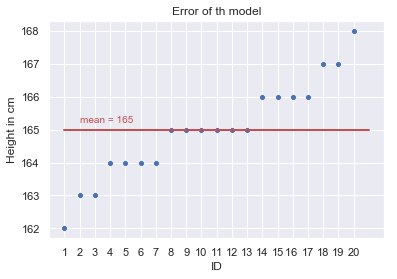

In [ ]:
# create a scatterplot (plt)
plt = sns.scatterplot(x="id", y="height",data=df,);
plt.set(xlabel='ID', ylabel='Height in cm', title='Error of th model');
plt.plot([0, 20], [165, 165], linewidth=2, color='r');
plt.text(1, 165.2,'mean = 165', rotation=0, color='r');

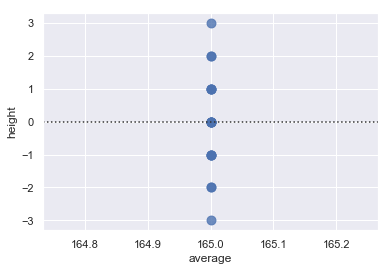

In [ ]:
# residual plot
sns.residplot(x="average", y="height", data=df, scatter_kws={"s": 80});

In [ ]:
# calculate squared error and assign it to dataframe
df = df.assign(error_sq = (df['height'] - df['average'])**2)
df.head(5)

,name,id,height,height_parents,average,pred,error,error_sq
0,Stefanie,1,162,161,165.0,161.711048,-3.0,9.0
1,Petra,2,163,163,165.0,163.335222,-2.0,4.0
2,Stefanie,3,163,163,165.0,163.335222,-2.0,4.0
3,Manuela,4,164,165,165.0,164.959396,-1.0,1.0
4,Nadine,5,164,163,165.0,163.335222,-1.0,1.0


In [ ]:
# calculate sum of squared error (which is in case of the mean the total error)
SS_T = df.error_sq.sum()
# print output
print('Sum of squared error (SS_T) of model 1:', SS_T)

Sum of squared error (SS_T) of model 1: 42.0


#### Model 2: Linear Regression

In [ ]:
lm.resid.sum()

4.206412995699793e-12

In [ ]:
# obtain the residuals from statsmodel (resid)
df['error_2'] = lm.resid
# square the residuals 
df['error_sq_2'] = df['error_2']**2
# show df
df.head(5)

,name,id,height,height_parents,average,pred,error,error_sq,error_2,error_sq_2
0,Stefanie,1,162,161,165.0,161.711048,-3.0,9.0,0.288952,0.083493
1,Petra,2,163,163,165.0,163.335222,-2.0,4.0,-0.335222,0.112374
2,Stefanie,3,163,163,165.0,163.335222,-2.0,4.0,-0.335222,0.112374
3,Manuela,4,164,165,165.0,164.959396,-1.0,1.0,-0.959396,0.920440
4,Nadine,5,164,163,165.0,163.335222,-1.0,1.0,0.664778,0.441930


In [ ]:
# Total sum of squares (SS_T: sum of squared errors of the base model, i.e. the mean)
print(SS_T)

42.0


In [ ]:
# Sum of squared residuals (SS_R)
SS_R = df['error_sq_2'].sum()
print(SS_R)
# SS_R – Sum of squared (whitened) residuals from statsmodel function
lm.ssr

7.0802644003777155


7.080264400377715

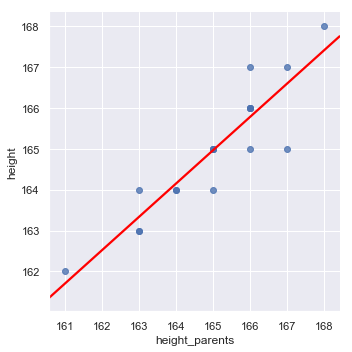

In [ ]:
# Plot regression line 
sns.lmplot(x='height_parents', y='height', data=df, line_kws={'color':'red'}, height=5, ci=None);

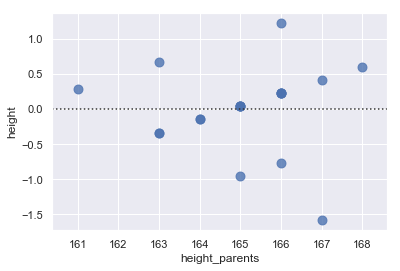

In [ ]:
sns.residplot(x="height_parents", y="height", data=df, scatter_kws={"s": 80});

In [ ]:
# Explained sum of squares  (SS_M = SS_T - SS_R)
SS_M = SS_T - SS_R
print(SS_M)
# Explained sum of squres (SS_M) from statsmodel function
lm.ess

34.919735599622285


34.919735599622285

$R^2$ is the proportion of the variance in the dependent variable that is predictable from the independent variable

In [ ]:
# R_Squared: explained sum of squared residuals
R_squared = SS_M / SS_T
print(R_squared)

0.831422276181483


In [ ]:
# R_Squared of statsmodel
lm.rsquared

0.831422276181483

In [ ]:
# Adjusted R_Squared: 
lm.rsquared_adj

0.8220568470804543

### Pearson's correlation coefficient

We just saw that $R^2$ represents the proportion of the variation in the outcome that can be predicted from the model:  

$R^2 = \frac{SS_M}{SS_T}$

with 

$SS_T =  \sum_{i=1}^n (observed_i - mean)^2$

$SS_R =  \sum_{i=1}^n (observed_i - model_i )^2$

$SS_M = SS_T - SS_R$

We can take the square root of this value to obtain **Pearson’s correlation coefficient** (we cover the topic of correlation in a separate application in detail) for the relationship between the values of the outcome predicted by the model and the observed values of the outcome. With only one predictor in the model this value will be the same as the Pearson correlation coefficient between the predictor and outcome variable.

$r = \sqrt{R^2} = \sqrt{\frac{SS_M}{SS_T}}$


As such, the correlation coefficient provides us with a good estimate of the overall fit of the regression model (i.e., the correspondence between predicted values of the outcome and the actual values), and $R^2$ provides us with a gauge of the substantive size of the model fit.

**Interpretation of r:**

$- 1 ≤ r ≤ 1$

With a perfect relationship (r = −1 or 1) the observed data basically fall exactly on the line (the model is a perfect fit to the data), but for a weaker relationship (r = −0.5 or 0.5) the observed data are scattered more widely around the line.

  * | r | = 0.10 (small effect)
  * | r | = 0.30 (medium effect)
  * | r | = 0.50 (large effect)

It’s worth bearing in mind that r is not measured on a linear scale, so an effect with r = 0.6 isn’t twice as big as one with r = 0.3.

#### Model 2: Linear Regression

In [ ]:
# correlation coefficient r
r = np.sqrt(R_squared)
print(r)

0.911823599267689


In [ ]:
# correlation coefficient with p-value
stats.pearsonr(df['height'], df['height_parents'])

(0.9118235992676891, 2.214412891654905e-08)

### Mean squared error, variance and standard deviation

Although the **sum of squared errors (SS)** is a good measure of the accuracy of our model, it depends upon the quantity of data that has been collected – the more data points, the higher the SS. 

By using the **average error**, rather than the total, we can overcome this problem. This measure is called the "**Mean Squared Error (MSE)**". In the regression setting, it is the most commonly-used measure to evaluate the performance of a model. 

To compute the average error we divide the sum of squares by the number of values that we used to compute that total. We again come back to the problem that we’re usually interested in the error in the model in the **population** (not the **sample**). 

To estimate the mean error in the population we need to divide not by the number of scores contributing to the total, but by the **degrees of freedom (df)**, which is the number of scores used to compute the total adjusted for the fact that we’re trying to estimate the population value. Note: you may encounter different formulas for calculating the mse. Some only devide by the number of observations and not the df.

Mean squared error:

$$ MSE = \frac {SS}{df} = \frac {\sum_{i=1}^n (outcome_i - model_i)^2}{df}$$

The **mean squared error** is also known as the **variance**. Furthermore, the **standard deviation** is the square root of the variance:

$$Variance = s^2 = \frac {SS}{df} = \frac {\sum_{i=1}^n (outcome_i - model_i)^2}{df}$$

Standard Deviation = $$\sqrt{s^2} = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{x}\right)^{2}} {df}}$$

which equals:

$$ s =  \frac {\sum_{i=1}^n (outcome_i - model_i)}{df}$$

A small **standard deviation** represented a scenario in which most data points were close to the mean, whereas a large standard deviation represented a situation in which data points were widely spread from the mean. 

#### Model 1: Mean

In [ ]:
# calculate mean squared error of the model 1 "the mean"
# Number of obeservations (lenght of DataFrame)
n = len(df["height"])
# calculate mse
mse = (SS_T/(n-1))
# print output
print('Mean squared error of the mean:', mse)

Mean squared error of the mean: 2.210526315789474


Mean squared error =  $\frac {SS}{df} = \frac {\sum_{i=1}^n (outcome_i - model_i)^2}{df} = \frac {\sum_{i=1}^n(x_i-\bar{x})^2}{df} = \frac {42}{19} = 2.210$

In our example, $n=20$, we have one parameter, p=1 (the mean), and therefore, the degrees of freedom are df = (p-1) = 20-1 = 19.

In [ ]:
# generate a variable called variance (to illustrate relationship between variance and standard deviation)
variance = mse
# obtain the standard deviation
print(f'Standard deviation (SD) of model 1 = {round(np.sqrt(variance),2)}')

Standard deviation (SD) of model 1 = 1.49


#### Model 2: Linear Regression

Statsmodel provide us with different options (we use mse_resid and mse_total): 

  * mse_model : Mean squared error the model. This is the explained sum of squares divided by the model degrees of freedom.
  * mse_resid : Mean squared error of the residuals. The sum of squared residuals divided by the residual degrees of freedom.
  * mse_total : Total mean squared error. Defined as the uncentered total sum of squares divided by n the number of observations.

In [ ]:
# Total MSE_T (this is the MSE of the basline mean model) from statsmodel
MSE_T = lm.mse_total
# print output
print('Total mean squared error (MSE_T):', MSE_T)
# compare this result to mse... they are the same

Total mean squared error (MSE_T): 2.210526315789474


In [ ]:
# Mean squared error of residuals (MSE_R)
MSE_R = SS_R / (20-2)
print('Mean squared error of residuals (MSE_R):', MSE_R)
# MSE of residuals from statsmodel (preferred)
print(f'Mean squared error od residuals (MSE_R): {lm.mse_resid}')

Mean squared error of residuals (MSE_R): 0.3933480222432064
Mean squared error od residuals (MSE_R): 0.39334802224320636


In [ ]:
# the standard deviation equals the root of the MSE_R
print(f'Standard deviation (SD) of model 2 = {round(np.sqrt(MSE_R),2)}')

Standard deviation (SD) of model 2 = 0.63


### F-Statistic

A second use of the sums of squares in assessing the model is the **F-test**. Test statistics (like F) are usually the amount of **systematic variance** divided by the amount of **unsystematic variance**, or, put another way, the model compared to the error in the model. This is true here: F is based upon the ratio of the improvement due to the model ($SS_M$) and the error in the model ($SS_R$). 

Because the sums of squares depend on the number of differences that were added up, the **average sums of squares** (referred to as the **mean squares** or **MS**) are used to compute F. 

The **mean sum of squares** is the sum of squares divided by the associated degrees of freedom (this is comparable to calculating the variance from the sums of squares). 

For $SS_M$ the degrees of freedom are the number of predictors in the model (*p*), and for $SS_R$ they are the number of observations (*n*) minus the number of parameters being estimated (i.e., the number of b coefficients including the constant). 

We estimate a "b" for each predictor and the intercept ($b_0$), so the total number of b's estimated will be *p + 1*, giving us degrees of freedom of n - (p + 1) or, more simply, n - p - 1. Thus:

$MS_M = \frac{SS_M}{p}$

$MS_R = \frac{SS_R}{n-p-1}$

**The F-statistic computed from these mean squares**

$$F = \frac{Systematic Variance}{Unsystematic Variance} = \frac{MS_M}{MS_R}$$

is a measure of how much the model has *improved* the prediction of the outcome compared to the level of inaccuracy of the model. If a model is good, then the improvement in prediction from using the model should be large ($MS_M$ will be large) and the difference between the model and the observed data should be small ($MS_R$ will be small). 

In short, for a good model the numerator in the equation above will be bigger than the denominator, resulting in a large F-statistic (greater than 1 at least).

This F has an associated probability distribution from which a **p-value** can be derived to tell us the probability of getting an F at least as big as the one we have if the null hypothesis were true. The null hypothesis in this case is a flat model (predicted values of the outcome are the same regardless of the value of the predictors). 

The F-statistic is also used to calculate the significance of $R^2$ using the following equation:

$F = \frac{(n-p-1)R^2}{p(1-R^2)}$

in which n is the number of cases or participants, and p is the number of predictors in the model. This F tests the null hypothesis that $R^2$ is zero (i.e., there is no improvement in the sum of squared error due to fitting the model).

#### Model 2: Linear Regression

In [ ]:
# Mean squared error of the model (MSE_M)
p = 1 # we only have one predictor (height_parents)
MS_M = (SS_M / p)
print('MS_M =', MS_M)
# MSE_M of residuals from statsmodel
print(f'MS_M = {lm.mse_model}')

MS_M = 34.919735599622285
MS_M = 34.919735599622285


In [ ]:
# Adjust notation and calculate F-value
MS_R = MSE_R
# F-value
F_value = (MS_M / MS_R)
print(F_value)

88.77567351293678


In [ ]:
# statsmodel
# Alternative way to obtain F-value (preferred)
print(lm.fvalue)
# which of course equals
F_val = (lm.mse_model / lm.mse_resid)
print(F_val)

88.77567351293679
88.77567351293679


### 5.2.5 Standard error

We just learned that the **standard deviation** tells us about how well the mean represents the sample data. However, if we’re using the **sample mean** to estimate this parameter in the **population** (like we did), then we need to know how well it represents the value in the population, especially because samples from a population differ. 

Imagine that we were interested in the height of *all* adult women in germany (so adult women in germany are the **population**). We could take a **sample** from this population (like we did with our 20 women), and when we do we are taking one of many possible samples. If we were to take several samples from the same population, then each sample would have its own mean, and some of these sample means will be different. 

Imagine we could obtain the height of all adult women in germany and could compute the mean of their height (which would equal $\mu$ = 168 cm). Then we would know, as an absolute fact, that the mean of the height is 168 cm (this is the population mean, **µ**, the parameter that we’re trying to estimate).

In reality, we don’t have access to the population, so we use a sample. In this sample we calculate the average height, known as the **sample mean** ($\bar{x}$), and discover it is 168 cm; that is, adult women in our sample are 168 cm tall, on average. Now we take a second sample and find that women in this sample are, on average, only 167 cm tall. In other words, the sample mean is different in the second sample than in the first. 

This difference illustrates **sampling variation**: that is, samples vary because they contain different members of the population; a sample that, by chance, includes relatively tall women will have a higher average than a sample that, by chance, includes some women who are relatively short.

Imagine that we now take a lot of samples (let's say 1000). If we plotted the resulting sample means as a histogram, we would observe a symmetrical distribution known as a **sampling distribution**. 

A **sampling distribution** is the frequency distribution of sample means (or whatever parameter you’re trying to estimate) from the same population. You need to imagine that we’re taking hundreds or thousands of samples to construct a sampling distribution. 

The sampling distribution of the mean tells us about the behaviour of samples from the population, and it is centred at around the same value as the mean of the population. Therefore, if we took the average of all sample means we’d get the value of the **population mean**. 

We can use the sampling distribution to tell us how *representative a sample* is of the population. Think back to the **standard deviation**. We used the standard deviation as a measure of how representative the mean was of the observed data. 

A small standard deviation represented a scenario in which most data points were close to the mean, whereas a large standard deviation represented a situation in which data points were widely spread from the mean. If our ‘observed data’ are sample means then the standard deviation of these sample means would similarly tell us how widely spread (i.e., how representative) sample means are around their average. Bearing in mind that the *average of the sample means* is the same as the *population mean*, the standard deviation of the sample means would therefore tell us how widely sample means are spread around the population mean: put another way, it tells us whether sample means are typically representative of the population mean.

The standard deviation of sample means is known as the **standard error of the mean (SE)** or standard error for short. Theoretically, the standard error could be calculated by taking the difference between each sample mean and the overall mean, squaring these differences, adding them up, and then dividing by the number of samples. Finally, the square root of this value would need to be taken to get the standard deviation of sample means: the standard error. In the real world, it would be to costly to collect thousands of samples, and so we compute the standard error from a mathematical approximation. 

Statisticians have demonstrated something called the **central limit theorem**, which tells us that as samples get large (usually defined as greater than 30), the sampling distribution has a normal distribution with a mean equal to the population mean, and we can calculate the standard deviation as follows: 

$$\sigma_{\bar{X}} = \frac{s} {\sqrt{N}}$$

Hence, if our sample is largeer than n=30 we can use the equation above to approximate the standard error (because it is the standard deviation of the sampling distribution).
Note: when the sample is relatively small (fewer than 30) the sampling distribution is not normal: it has a different shape, known as a **t-distribution**, which we’ll cover later.

**Summary**

  * The standard error of the mean is the standard deviation of sample means. 
  * As such, it is a measure of how representative of the population a sample mean is likely to be. 
  * A large standard error (relative to the sample mean) means that there is a lot of variability between the means of different samples and so the sample mean we have might not be representative of the population mean. 
  * A small standard error indicates that most sample means are similar to the population mean (i.e., our sample mean is likely to accurately reflect the population mean).

#### Model 1: Mean

In [ ]:
# calculate standard error (...we ignore the fact that our sample is small since n < 30) 
se = df['height'].sem()
print(se)
# assign se to df
df = df.assign(se=se)

0.33245498310218435


In [ ]:
# alternative way to calculate standard error (se)
# calculate standard deviation (s)
s = df["height"].std()
# calculate se
se = (s/np.sqrt(n))
print(se)

0.33245498310218435


#### Model 2: Linear Regression

In [ ]:
# Get standard error of parameters
se_2 = lm.bse
print('Standard error (SE) od model 2:', se_2)

Standard error (SE) od model 2: Intercept         14.226306
height_parents     0.086190
dtype: float64


### Confidence interval

As a brief recap, we usually use a **sample value** as an estimate of a **parameter** (e.g., the mean or any other parameter b) in the **population**. We’ve just seen that the **estimate of a parameter** (e.g., the mean) will differ across samples, and we can use the **standard error** to get some idea of the extent to which these estimates differ across samples. We can also use this information to calculate boundaries within which we believe the population value will fall. Such boundaries are called **confidence intervals**. 

For example, perhaps we might want to know how often, *in the long run*, an interval contains the true value of the parameter we’re trying to estimate (in the case of model 1, the mean). This is what a **confidence interval** does. Typically, we look at 95% confidence intervals, and sometimes 99% confidence intervals, but they all have a similar interpretation: they are limits constructed such that, for a certain percentage of samples (be that 95% or 99%), the true value of the population parameter falls within the limits. So, when you see a 95% confidence interval for a mean, think of it like this: 

  * if we’d collected 100 samples, and for each sample calculated the parameter (e.g. the mean) and a confidence interval for it, then for 95 of these samples, the confidence interval contains the value of the parameter (e.g. the mean) in the population, and in 5 of the samples the confidence interval does not contain the population paramater (e.g. the mean). 
  
The trouble is, you do not know whether the confidence interval from a particular sample is one of the 95% that contain the true value or one of the 5% that do not.

Here is an example of a common wrong interpretation of confidence intervalls:


* **Wrong** interpretation: a 95% confidence interval has a 95% probability of containing the population parameter. 

It is a common mistake, but this is *not* true. The 95% reflects a *long-run probability*. It means that if you take repeated samples and construct confidence intervals, then 95% of them will contain the population value. That is not the same as a particular confidence interval for a specific sample having a 95% probability of containing the value. In fact, for a specific confidence interval, the probability that it contains the population value is either 0 (it does not contain it) or 1 (it does contain it). You have no way of knowing which it is.

We know (in large samples) that the sampling distribution of parameters (e.g. means) will be normal, and the **normal distribution** has been precisely defined such that it has a mean of 0 and a standard deviation of 1. We can use this information to compute the probability of a score occurring, or the limits between which a certain percentage of scores fall. 

We make use of the fact that 95% of **z-scores** fall between −1.96 and 1.96. This means that if our sample parameters (e.g. means) were normally distributed with a mean of 0 and a standard error of 1, then the limits of our confidence interval would be −1.96 and +1.96. Luckily we know from the **central limit theorem** that in large samples (above about 30) the sampling distribution will be normally distributed. 

**Visualize confidence intervals in plots**

We saw that confidence intervals provide us with information about a parameter, and, therefore, you often see them displayed on graphs.

The confidence interval is usually displayed using something called an **error bar**, which looks like the letter ‘I’. An error bar can represent the **standard deviation**, or the **standard error**, but more often than not it shows the **95% confidence interval** of the mean. So, often when you see a graph showing the mean, perhaps displayed as a bar or a symbol, it is accompanied by this I-shaped bar. 

#### Model 1: The Mean

First of all, we convert scores so that they have a mean of 0 and standard deviation of 1 (**z-scores**) using this equation:

$$z = \frac{X-\bar{X}}{s}$$

In [ ]:
# calculate z-scores
z = stats.zscore(df.height)
print(z)
# assign z-scores to df
df = df.assign(z = z)

[-2.07019668 -1.38013112 -1.38013112 -0.69006556 -0.69006556 -0.69006556
 -0.69006556  0.          0.          0.          0.          0.
  0.          0.69006556  0.69006556  0.69006556  0.69006556  1.38013112
  1.38013112  2.07019668]


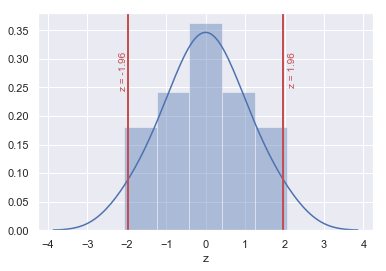

In [ ]:
plt = sns.distplot(df.z);
# draw a vertical line
plt.axvline(1.96, 0, 1, linewidth=2, color='r');
# add text
plt.text(2.1, 0.3,'z = 1.96', rotation=90, color='r');
plt.axvline(-1.96, 0, 1, linewidth=2, color='r');
plt.text(-2.2, 0.3,'z = -1.96', rotation=90, color='r');

If we know that our limits are −1.96 and 1.96 as z-scores, then to find out the corresponding scores in our raw data we can replace z in the equation (because there are two values, we get two equations):

$$1.96 = \frac{X-\bar{X}}{s}$$

and  

$$-1.96 = \frac{X-\bar{X}}{s}$$

We rearrange these equations to discover the value of X:

$$1.96 \times s = X - \bar{X}$$  

$$(1.96 \times s) + \bar{X} = X$$  

and

$$-1.96 \times s = X - \bar{X}$$

$$(-1.96 \times s) + \bar{X} = X$$ 

Therefore, the confidence interval can easily be calculated once the **standard deviation** (s in the equation) and **mean** ($\bar{x}$ in the equation) are known. 

However, we use the **standard error** and not the standard deviation because we’re interested in the variability of sample means, not the variability in observations within the sample. 

The lower boundary of the confidence interval is, therefore, the mean minus 1.96 times the standard error, and the upper boundary is the mean plus 1.96 standard errors: 


**lower boundary of confidence intervall** = $\bar{X} - (1.96 \times SE)$

**upper boundary of confidence intervall** = $\bar{X} + (1.96 \times SE)$

As such, the mean is always in the centre of the confidence interval. We know that 95% of confidence intervals contain the population mean, so we can assume this confidence interval contains the true mean; therefore, if the interval is small,the sample mean must be very close to the true man. Conversely, if the confidenve interval is very wide then the sample mean could be very different from the true mean, indicating that it is a bad representation of the population.

In [ ]:
# lower boundary
lb = (df.height.mean() - (1.96*se))
# upper boundary
up = (df.height.mean() + (1.96*se))
print('Lower boundary of CI', lb)
print('Upper boundary of CI', up)

Lower boundary of CI 164.34838823311972
Upper boundary of CI 165.65161176688028


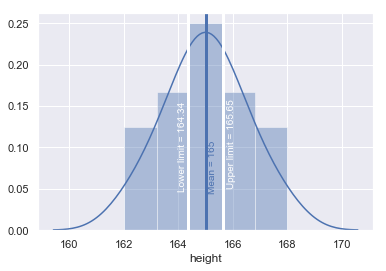

In [ ]:
# draw limits of confidence intervall
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
plt.text(165.1, 0.1,'Mean = 165', rotation=90, color='b');
# draw a vertical line to mark the lower limit of the confidence intervall
plt.axvline(164.348388, 0, 1, linewidth=3, color='w');
# add text
plt.text(164, 0.15,'Lower limit = 164.34 ', rotation=90, color='w');
# draw a vertical line to mark the upper limit of the confidence intervall
plt.axvline(165.651612, 0, 1, linewidth=3, color='w');
plt.text(165.8, 0.15,'Upper limit = 165.65', rotation=90, color='w');

#### Model 2: Linear Regression

Confidence intervall for parameter $b_1$ (height_parents)

**lower boundary of confidence intervall** = $b_1 - (1.96 \times SE(b_1))$

**upper boundary of confidence intervall** = $b_1 + (1.96 \times SE(b_1))$

In [ ]:
# Obtain confidence interval for fitted parameters 
lm.conf_int(alpha=0.05)

,0,1
Intercept,1.076702,60.853420
height_parents,0.631009,0.993165


In [ ]:
# Make a prediction for height when parents average height is 168 cm
to_predict = pd.DataFrame({'height_parents':[168]})
results = lm.get_prediction(to_predict)
round(results.summary_frame(alpha=0.05),2)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,167.4,0.29,166.79,168.01,165.94,168.85


- The predicted height for an average parents height of 168 cm is 167.4.
- For 95% the confidence interval is [166.79, 168.01] and the prediction interval is [165.94, 168.85]

How much will the outcome vary from our prediction? We use **prediction intervals** (obs_ci_lower and obs_ci_uppper) to answer this question. Prediction intervals are always wider than confidence intervals, because they incorporate both the error in the estimate for f(X) (the reducible error) and the uncertainty as to how much an individual point will differ from the population regression (the irreducible error). 

We interpret this to mean that 95% of intervals of this form will contain the true value of Y for parents with this average height. Note that both intervals are centered at 167.4 cm, but that the **prediction interval** is substantially wider than the confidence interval, reflecting the increased uncertainty about the individual height for given parents height in comparison to the average height of many parents. 

/Users/jankirenz/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


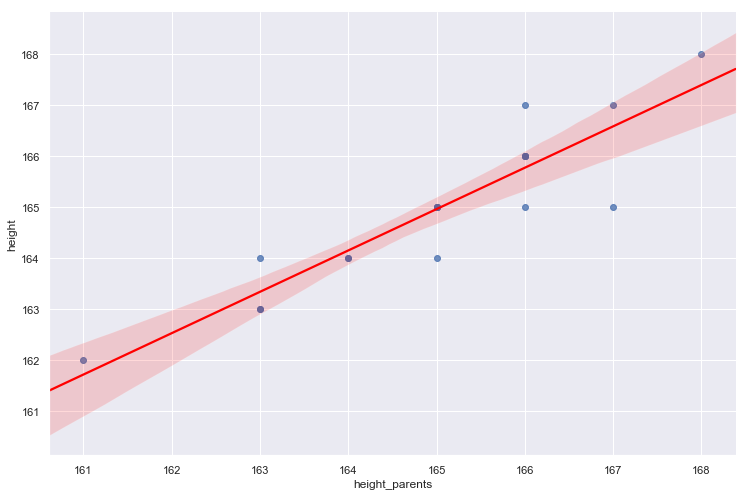

In [ ]:
# Plot regression line with CI 95%
sns.lmplot(x='height_parents', y='height', data=df, order=1, line_kws={'color':'red'}, size=7, aspect=1.5, ci=95);

---

### Confidence intervals in small samples

The procedure we just used is fine when samples are large, because the central limit theorem tells us that the sampling distribution will be normal. However, for small samples, the sampling distribution is not normal – it has a t-distribution. The t-distribution is a family of probability distributions that change shape as the sample size gets bigger (when the sample is very big, it has the shape of a normal distribution). 

To construct a confidence interval in a small sample we use the same principle as before, but instead of using the value for z we use the value for t:

lower boundary of confidence intervall = $\bar{X} - (t_{n-1} \times SE)$

upper boundary of confidence intervall = $\bar{X} + (t_{n-1}  \times SE)$

The (n − 1) in the equations is the degrees of freedom and tells us which of the t-distributions to use. For a 95% confidence interval, we can calculate the value of t for a two-tailed test with probability of 0.05, for the appropriate degrees of freedom.

In [ ]:
# calculate t-statistic
# 95% confidence interval, two tailed test, 
# p<0.05 (we need to take 0.025 at each side), n=20, df=19
t = stats.t.ppf(1-0.025, 19)
print(t)
# lower boundary
lb_t = (df.height.mean() - (t*se))
# upper boundary
up_t = (df.height.mean() + (t*se))
print('Lower boundary of CI (t-statistics)', lb_t)
print('Upper boundary of CI (t-statistics)', up_t)

2.093024054408263
Lower boundary of CI (t-statistics) 164.30416372335924
Upper boundary of CI (t-statistics) 165.69583627664076


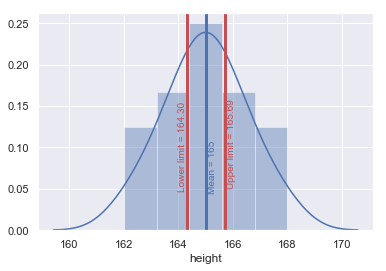

In [ ]:
# draw limits of confidence intervall for t-statistic
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
plt.text(165.1, 0.1,'Mean = 165', rotation=90, color='b');
# draw a vertical line to mark the lower limit of the confidence intervall
plt.axvline(164.304164, 0, 1, linewidth=3, color='r');
# add text
plt.text(164, 0.15,'Lower limit = 164.30 ', rotation=90, color='r');
# draw a vertical line to mark the upper limit of the confidence intervall
plt.axvline(165.695836, 0, 1, linewidth=3, color='r');
plt.text(165.8, 0.15,'Upper limit = 165.69', rotation=90, color='r');

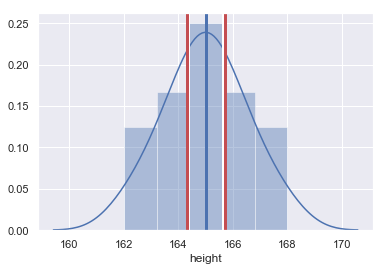

In [ ]:
# compare CI z-statistic with t-statistic
# draw limits of confidence intervall
plt = sns.distplot(df.height);
# draw a vertical line to mark the mean 
plt.axvline(165, 0, 1, linewidth=3, color='b');
# add text
# draw vertical lines to mark the lower/upper limit of the confidence intervall (z)
plt.axvline(164.348388, 0, 1, linewidth=3, color='w');
plt.axvline(165.651612, 0, 1, linewidth=3, color='w');
# draw vertical lines to mark the lower/upper limit of the confidence intervall (t)
plt.axvline(164.304164, 0, 1, linewidth=3, color='r');
plt.axvline(165.695836, 0, 1, linewidth=3, color='r');

---
---

## Further measures for model selection

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. 

Both the Bayesian information criterion (**BIC**) (also called the Schwarz criterion SBC or SBIC) and Akaike information criterion (**AIC**) attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC. 

Both measures are an estimator of the **relative quality** of statistical models for a given set of data. Hence, they are used to select the best performing model.  

Here we cover AIC and BIC in the case of a linear model fit using least squares; however, these quantities can also be defined for more general types of models.

For both measures, lower values are better

### Bayesian information criterion (BIC) 

In [ ]:
# BIC
lm.bic

41.980585438104086

### Akaike information criterion (AIC) 

In [ ]:
# AIC
lm.aic

39.989120890996105